# Sampling

In this article, I will discuss some sampling methods: **Inverse Samling**, **Reject-Accept Sampling**, **Important Sampling**, **Markov Chain Monte Carol(MCMC)-MH Algorithm** and **Gibbs Sampling**.

*Why do we need sampling?* Sampling is the key issue of Monte Carol method, a better sampling approach can help us obtain a better result in term of accuracy and time in practise. For example, density estimation is hot topic in statistics all the time.(**Why？** Because we can calculate expectation, variation and other property related to pdf once we know some information on pdf.) The easies way to get a pdf of random variable $X$ is to inverse CDF.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize']=(10,8)

## 1. Inverse sampling

The idea behind inverse sampling is very ituitive: to transform uniform samples into samples from a different distribution. That is, by somehow drawing from an uniform distribution(because CDF is range from 0 to 1), we make it possible to draw from the other distribution. The procedure of inverse sampling is illustrated as:

<img src="http://www.howardrudd.net/wp-content/uploads/2015/02/InverseTransform23.png" width = "600" height = "400"/>

The assumption of inverse sampling is that **CDF must be invertiable!** 

The algorithm of inverse sampling is:
    
1. get a uniform sample $\mu$ from **U** (0,1)
2. obtain the sample $x$ through $x=F^{-1}(\mu)$ where F is the CDF distribution we desire.
3. repeat.

**Why does inverse sampling work?**

To be note that:

$$
            \begin{equation}
            F^{-1}(\mu)= \text{ smallest }x \text{ such that } F(x)\geq \mu
            \end{equation}
$$

What's the ditribution does the random variable $y=F^{-1}(\mu)$ follow?

The CDF of y is $p(y\leq x)$. Since the CDF is monotonic, we can obtain without loss of generity:

$$
    \begin{equation}
    p(y\leq x)=p(F(y)\leq F(x))=p(\mu\leq F(x))=F(x)
    \end{equation}
$$

Thus we get the CDF and hence the pdf that we want to sample from

**Limitation of Inverse Sampling**

Not all the pdf has analytical CDF, for example, gaussian ditribution. In addition, for some complex distributions, the inverse CDF may be complicated and it is hard to do inverse sampling.

## 2. Rejection Sampling

### 2.1 Basic Rejection Sampling

The basic idea is come up with von Neumann. **If you have a function you are trying to sample from, whose functional form is well known, basically accept the sample by generating a uniform random number at any $x$ and accepting it if the value is below the value of the function at that $x$.** The procedure of basic sampling is illustrated as:

<img src="https://am207.github.io/2017/wiki/images/Rejection.png" width = "600" height = "400"/>

The procedure of basic rejection sampling:

1. Draw $x$ uniformly from $[x_{min}, x_{max}]$.
2. Draw $y$ uniformly from $[0, y_{max}]$.
3. If $y<f(x)$, accept. Else, reject.
4. Repeat.

**The intuitive explaination:** This works as more samples will be accepted in the regions of $x$-space where the function $f$ is higher: indeed they will be accepted in the ratio of the height of the function at any given $x$ to $y_{max}$.  **From the perspective of probability interpretation,**the accept-to-total ratio reflects the probability mass in each x silver. 

### Code of Basic Rejction Sampling

('Count: ', 99391, ', Accepted: ', 10000)
2378


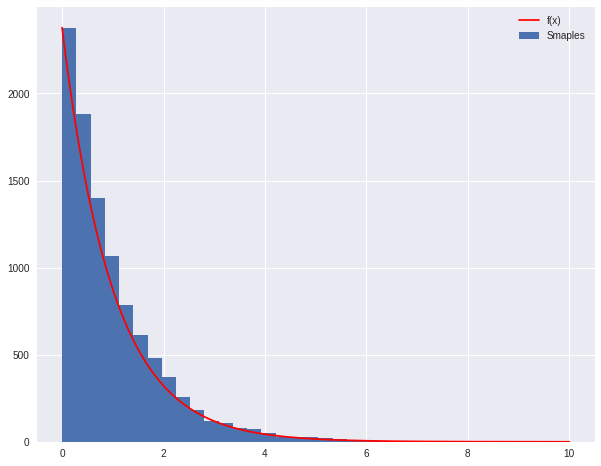

In [2]:
## target function

f = lambda x: np.exp(-x)
#f = lambda x x**2

## domain limits
xmin = 0 # lower bound of feasiable domain
xmax = 10 #upper bound of feasiable domain

## range limit for y
ymax=1
#ymax = 100

N = 10000 #the total of samples
accept =0 #count the total number of acceptance
samples = np.zeros(N)
count = 0

while (accept <N):
    
    x = np.random.uniform(xmin,xmax)
    y = np.random.uniform(0, ymax)
    
    if y<f(x):
        samples[accept]=x
        accept += 1
    count +=1

print('Count: ', count, ', Accepted: ', accept)

hinfo = np.histogram(samples, 30)
plt.hist(samples, bins=30, label='Smaples')
print(hinfo[0][0])
xvals = np.linspace(xmin, xmax, 10000)
plt.plot(xvals, hinfo[0][0]*f(xvals), 'r', label='f(x)')
plt.grid('on')
plt.legend()

### 2.2 Modified Reject Sampling

The basic rejection sampling has determinstic limitation(**low acceptance rate**):
    
For basic rejection sampling, we need know the supremum of function we want to sample from. In practice, it is hard to evaluate the function on interest domain and find a tight bound for this function. Furthermore, even if you find a tight bound for this function, you may abserve that the accept rate is very low, epescially in low density regions.

In order to overcome low acceptance rate while preserving the simplicity of rejection sampling, **proposal density** $g(x)$ is introduced. This proposal density $g(x)$ is commom density function $f^{'}(x)$ with a scaling factor $M$. (**Why? Because it is impossible to find a density function always above another density function. The integration of density function is always equal to 1. $\int p(x) dx=1$**) The reason we introduce proposal density function is to increase acceptance rate, but this is not the only way to do so.

The proposal density must has the following charicteristics:

1. $g(x)$ is easy to sample and calculate pdf
2. the range of M is $[0, \infty]$ so that $Mg(x)>f(x)$ in your entire interest domain.
3. ideally g(x) will be somewhat close to $f(x)$ so that you will sample more in high density regions and much less in low density region.

Obviously, the optimal value of $M$ is the supremum over your domain of interest of $\frac{f}{g}$. At that position x, the acceptance rate is  1. Ideally, the value of $M$ should be as close as to 1, since the acceptance rate is $\frac{1}{M}$. In other words, proposl density function $g(x)$ should be as indentical as $f(x)$.

The proportion of samples from $g(x)$ that are accept at each position $x$ and then average over $x$:

$$
\begin{equation}
\int dxg(x)\text{prop}(x)=\int dxg(x)\frac{f(x)}{Mg(x)}=\frac{1}{M}\int dxf(x)=\frac{1}{M}
\end{equation}
$$

**The procedure of modified rejection sampling is:**

1. Draw $x$ from your proposal distribution $g(x)$.
2. Draw $y$ uniformly from $[0, 1]$.
3. If $y<\frac{f(x)}{Mg(x)}$, accept the sample, otherwhile, reject the sample.
4. Repeat the procedure.

<img src="https://am207.github.io/2017/wiki/images/rejsteroid.png" width = "600" height = "400"/>

## The code of modified rejection sampling

('Count', 24191, 'Accepted', 10000)


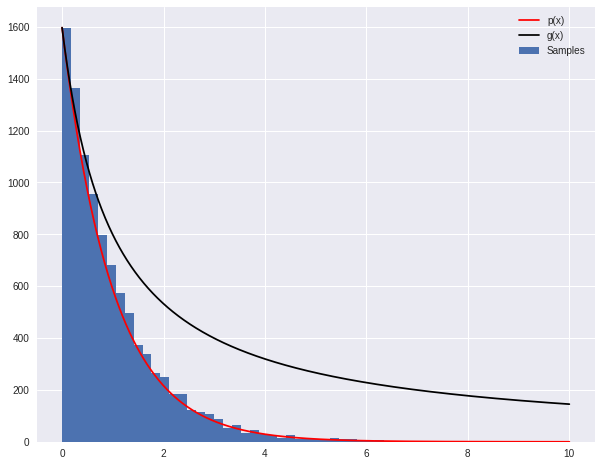

In [3]:
p = lambda x: np.exp(-x)  # our distribution
g = lambda x: 1/(x+1)  # our proposal pdf (we're thus choosing M to be 1)
invCDFg = lambda x: np.log(x +1) # generates our proposal using inverse sampling

# domain limits
xmin = 0 # the lower limit of our domain
xmax = 10 # the upper limit of our domain

# range limits for inverse sampling
umin = invCDFg(xmin)
umax = invCDFg(xmax)

N = 10000 # the total of samples we wish to generate
accepted = 0 # the number of accepted samples
samples = np.zeros(N)
count = 0 # the total count of proposals

# generation loop
while (accepted < N):
    
    # Sample from g using inverse sampling
    u = np.random.uniform(umin, umax)
    xproposal = np.exp(u) - 1
    
    # pick a uniform number on [0, 1)
    y = np.random.uniform(0,1)
    
    # Do the accept/reject comparison
    if y < p(xproposal)/g(xproposal):
        samples[accepted] = xproposal
        accepted += 1
    
    count +=1
    
print("Count", count, "Accepted", accepted)

# get the histogram info
hinfo = np.histogram(samples,50)

# plot the histogram
plt.hist(samples,bins=50, label=u'Samples');

# plot our (normalized) function
xvals=np.linspace(xmin, xmax, 1000)
plt.plot(xvals, hinfo[0][0]*p(xvals), 'r', label=u'p(x)')
plt.plot(xvals, hinfo[0][0]*g(xvals), 'k', label=u'g(x)')



# turn on the legend
plt.legend()

## 3. Important Sampling

**Different from reject sampling, import sampling does not has any rejection action. To replace with rejection action, important sampling adopt the approach of weighted sample.** In detail, we want to draw sample from $h(x)$, where a function whose integral or expectation we desire, is large. In the case of expecation, it would indeed be even better to draw more samples where $h(x)f(x)$ is large, where $f(x)$ is the pdf we are calculating the integral with respect to. I will show how importan sampling work below:

**Why improtant?** Often, in the computation of an expectation or other integral, the integrand has a very small value on a dominant fraction of the whole integration volume. If the points are chosen evenly in the integration volume, the small minority of the points close to the ‘peak’ give the dominant contribution to the integral.

**(Example: Expectation)**

$$
\begin{equation}
\mathbb{E}_{f}[h]=\int_{V}f(x)h(x)dx
\end{equation}
$$

Choose a distribution $g(x)$, which is close to the function $f(x)$, but which is simple enough so that it is possible to generate random $x$-values from this distribution. The integral can now be re-written as:

$$
\begin{equation}
\mathbb{E}_{f}[h]=\int h(x)g(x)\frac{f(x)}{g(x)} dx
\end{equation}
$$

Therefore if we choose random number $x_{i}$ from distribution $g(x)$, we obtain:

$$
\begin{equation}
\mathbb{E}_{f}[h(x)]=\lim_{N\rightarrow \infty}\frac{1}{N}\sum_{x_{i}\sim g(\cdot)}h(x_{i})\frac{f(x_{i})}{g(x_{i})}
\end{equation}
$$

Let $w(x_{i})=\frac{f(x_{i})}{g(x_{i})}$, the formulation can be rewritten:

$$
\begin{equation}
\mathbb{E}_{f}[h(x)]=\lim_{N\rightarrow \infty}\frac{1}{N}\sum_{x_{i}\sim g(\cdot)}h(x_{i})\omega(x_{i})
\end{equation}
$$

Now the variance(error) of monte carol is that:

$$
\begin{equation}
\widetilde{V}=\frac{V_{f}[h(x)]}{N}
\end{equation}
$$

where $N$ is the sample size.

With the important sampling this formula has now changed to

$$
\begin{equation}
\widetilde{V}=\frac{V_{g}[\omega(x)h(x)]}{N}
\end{equation}
$$

Our goal is to minimize the $V_{g}[\omega(x)h(x)]$.

As a somewhat absurd notion, this variance should be set to zero, if 

$$
\begin{equation}
\omega(x)h(x)=C\Rightarrow f(x)h(x)=Cg(x)
\end{equation}
$$

which leads to (since $g(x)$ is density thus we need normalization):

$$
\begin{equation}
g(x) = \frac{f(x)h(x)}{\int f(x)h(x)dx}=\frac{f(x)h(x)}{\mathbb{E}_{f}[h(x)]}
\end{equation}
$$

Actually, the expection is what we expect to estimate. Let's ignore the denominator, this formula tell us that to achieve low variance, we must have $g(x)$ large where the product $f(x)h(x)$ is large. Didirectly, maximizing the latter in some fashion was our original intuition.

Or from another perspective, $\frac{f(x)}{g(x)}$ ought to be large where $h(x)$ is large. This means that, as we say earlier, choose more samples near the peak.

In detail,  We have a $f$ that we might or might not know. We have a pdf $g$ which we choose to be higher than $f$ at the points where hh has peaks. Now what we are left to do is to sample from $g$, and this will give us an oversampling at the place hh has peaks, and thus we must correct this there by multiplying by weights $w=\frac{f}{g}<1$ in thse places.

Be careful to choose $g(x)$ appropriately, it should have thicker tails than $f$, or the ratio $\frac{f}{g} will be too big and count contribute too much in the tails. All of these considerations may be seen in the diagram below:

<img src="https://am207.github.io/2017/wiki/images/importance.png" width = "600" height = "400"/>

Another way of seeing this whole thing is that we will draw the sample from a proposal distribution and re-weight the integral appropriately so that the expectation with respect to the correct distribution is used. And since $\frac{f}{g}$ is flatter than $f$, the variance of $h\times\frac{f}{g}$ is smaller that the variance of $h\times f$ and therefore the error will be smaller for all N.

### Code of Important Sampling ( Example: $\int_{0}^{\pi}sin(x)xdx$ )

('Mean basic MC estimate:', 3.1391984278622358)
('Standard deviation of our estimates:', 0.062658070909428501)
('Mean important sampling MC estimate:', 3.1410444202186181)
('Standard deviation of our estimates:', 0.016044636045090897)


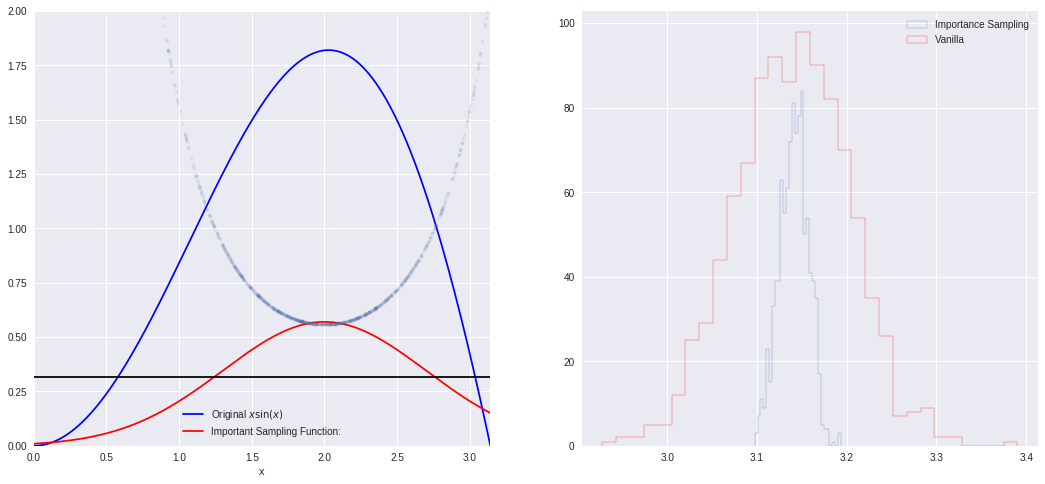

In [4]:
from scipy import stats
from scipy.stats import norm

mu = 2;
sig = .7;

f = lambda x: np.sin(x)*x
infun = lambda x: np.sin(x)-x*np.cos(x)
p = lambda x: (1/np.sqrt(2*np.pi*sig**2))*np.exp(-(x-mu)**2/(2.0*sig**2))
normfun = lambda x: norm.cdf(x-mu, scale=sig)

# Range of integration 
xmax = np.pi
xmin = 0

# Number of draws
N = 1000

#Just Want to plot the function
x = np.linspace(xmin,xmax,1000)
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.plot(x, f(x), 'b', label='Original $x\sin(x)$')
plt.plot(x, p(x), 'r', label='Important Sampling Function:')
plt.plot(x, np.ones(1000)/np.pi, 'k')
xis = mu + sig*np.random.randn(N,1)
plt.plot(xis, 1/(np.pi*p(xis)), '.', alpha=0.1)
plt.xlim([0, np.pi])
plt.ylim([0, 2])
plt.xlabel('x')
plt.legend()

## VANILLA MONTE CAROL
Ivmc = np.zeros(1000)
for k in np.arange(0, 1000):
    x = np.random.uniform(low=xmin, high=xmax, size=N)
    Ivmc[k] = (xmax-xmin)*np.mean(f(x))
    
print('Mean basic MC estimate:', np.mean(Ivmc))
print('Standard deviation of our estimates:', np.std(Ivmc))

## IMPORTANCE SAMPLING, choose gaussian so it is 
## similar to the original functions 

Iis = np.zeros(1000)
for k in np.arange(0, 1000):
    xis = mu + sig * np.random.randn(N,1)
    xis = xis[(xis<xmax) & (xis>xmin)]
    
    # normalization for gaussian from 0 to pi
    normal = normfun(np.pi)-normfun(0)
    Iis[k] = np.mean(f(xis)/p(xis))*normal

print('Mean important sampling MC estimate:', np.mean(Iis))
print('Standard deviation of our estimates:', np.std(Iis))

plt.subplot(1,2,2)
plt.hist(Iis, 30, histtype='step', label='Importance Sampling')
plt.hist(Ivmc, 30, color='r', histtype='step', label='Vanilla')
plt.grid('on')
plt.legend()

## 4. Markov Chain Monte Carol(MCMC)

### 4.1 What's the Markov Chain

**([Definition](https://en.wikipedia.org/wiki/Markov_chain):)** A Markov Chain is a stochastic process that satisfies the Markov property. In other words, a sequence of random variable taking value in state space is called a Markov Chain if the probability of the next step only depends on the current state(from [Lecture 9](https://am207.github.io/2017/wiki/markov.html)).

Using the notation of transition probabilities to define the probability of going from state $x$ ot state $y$ as $T(x\vert y)$, we can write this mathematically:

$$
\begin{equation}
T(x_{n+1}\vert x_{n},...,x_{1})=T(x_{n+1}\vert x_{n})
\end{equation}
$$

### 4.2 Some Markov Chains

**Homogenous Markov Chain:** A chain is homogeneous at step tt if the transition probabilities are independent of tt. Thus the evolution of the Markov chain only depends on the previous state with a fixed transition matrix.

**Irreducible Markov Chain:** Every state is accessible in a finite number of steps from another state. That is, there are no absorbing states. In other words, one eventually gets everywhere in the chain.(*example:* Consider as an example surfing the web. We do want to reach all parts of the web so we dont want to be trapped into an subset.)

**Recurrent:** States visited repeatedly are recurrent: positive recurrent if time-to-return is bounded and null recurrent otherwise. Harris recurrent if all states are visited infinitely often as $t\rightarrow \infty$.

**Aperiodic:** There are no deterministic loops. This would be bad in our web example as well as we would be stuck in a loop at some pages.


<img src="https://am207.github.io/2017/wiki/images/mchain2.png" width = "600" height = "400" alt="Important Sampling" />

### 4.3 Stationary Markov Chain

**(Formal Definition of Stationarity):** A staionary Markov Chain produces the same marginal distribution when multiplied by the transition matrix. That is 

$$
\begin{equation}
sT = s \text{ or }\sum_{i}s_{i}T_{ij}=s_{j}
\end{equation}
$$

In the case of continuous state space, which are the ones we encounter in sampling, if the transition kernel T is defined so that

$$
\begin{equation}
\int dx_{i}s(x_{i})T(x_{i+1}\vert x_{i})=s(x_{i+1})
\end{equation}
$$

then 

$$
\begin{equation}
\int dxs(x)T(y\vert x)=s(y)
\end{equation}
$$

**Ergodicity**: Aperiodic, irreducible, positive Harris recurrent markov chains are ergodic, that is, in the limit of infinite (many) steps, the marginal distribution of the chain is the same(the probability of all state remain stable, nonzero and is independent with the initial position). This means that if we take largely spaced about samples from a stationary markov chain, we can draw independent samples.

$$
\begin{equation}
\int g(x)f(x)dx=\frac{1}{N}\sum_{j=B+1}^{B+N}g(x_{j})
\end{equation}
$$

Here B is called the burin (which comes from the approach to stationarity after a while) and T is called the thinning (which comes from ergodicity). So we have this “ergodic” law of large numbers.

([摘抄慕课网笔记](https://mooc.guokr.com/note/15627/))在满足一定条件的情况下，马尔可夫过程将收敛至一个均衡。这是一个统计均衡，在每种状态下的概率是固定不变的，但事物将依旧在各个状态间转移。

马尔可夫过程收敛到均衡的四个条件：

一、可能的状态数量是有限的。

二、转移概率固定不变。

三、从任意一个状态能够变到任意其他一个状态。有可能不是从状态A直接变到状态C，而是先变到状态B再变到C，但只要有路径从状态A变成状态C就行。

四、过程不是简单循环。比如不能是从全A变到全B，然后又自动从全B变到全A。

马尔可夫收敛定理（Markov Convergence Theorem）：如果满足上述四个条件，一个马尔科夫过程将收敛到一个均衡状态，且此均衡唯一。

**只要转移概率不变，那么初始状态、历史过程、中途干预都不重要，最后必将达到那个唯一的均衡。换句话说，马尔科夫链最后达到的均衡与初始状态，转移过程以及中途干预无关。** 

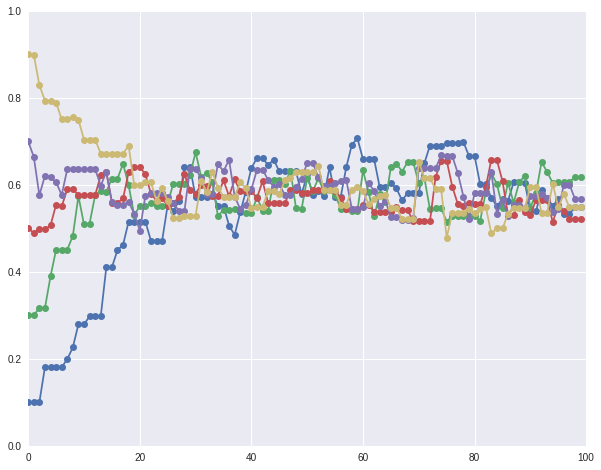

In [5]:
import scipy.stats as st

def target(lik, prior, n, h, theta):
    if theta < 0 or theta > 1:
        return 0
    else:
        return lik(n, theta).pmf(h)*prior.pdf(theta)

def mh_coin(niters, n, h, theta, lik, prior, sigma):
    samples = [theta]
    while len(samples) < niters:
        theta_p = theta + st.norm(0, sigma).rvs()
        rho = min(1, target(lik, prior, n, h, theta_p)/target(lik, prior, n, h, theta ))
        u = np.random.uniform()
        if u < rho:
            theta = theta_p
        samples.append(theta)
    return samples

n = 100
h = 61
lik = st.binom
prior = st.beta(10, 10)
sigma = 0.05
niters = 100

sampless = [mh_coin(niters, n, h, theta, lik, prior, sigma) for theta in np.arange(0.1, 1, 0.2)]

# Convergence of multiple chains

for samples in sampless:
    plt.plot(samples, '-o')
plt.xlim([0, niters])
plt.ylim([0, 1]);

### 4.3 Markov Chain and Monte Carol Methods

A irreducible (goes everywhere) and aperiodic (no cycles) markov chain will converge to a stationary markov chain. It is the marginal distribution of this chain that we want to sample from, and which we do in metropolis (and for that matter, in simulated annealing).

As we can see above, to find stationary distribution, we need to solve an eigenvector proble. This can be hard.

However, A sufficient, but not necessary, condition to ensure that s(x)s(x) is the desired stationary distribution is the already seen reversibility condition, also known as detailed balance:

$$
\begin{equation}
\int dxs(x)t(y\vert x)=s(y)\int dxT(x\vert y)
\end{equation}
$$

which gives back us back the stationarity condition from above.

Thus we want to design us samplers which satisfy detail balance.

### 4.4 Metropolis Hasting Algorithm(MH Algorithm)

**(why do we need Metropolis Hasting Algorithm?)** We've learnt how to do the inverse transform and how to use rejection sampling with a majority function. So why do we use these methods to sample a ditribution? ** inefficient as dimensions increased.** In other words, dimension curse. **How do we understand this point?**

In generally, we want to calculate the expectation of distribution as sample average, however, as dimension of space increased, majorizing in multiple dimensions can have us spending a lot of time in tail dimension because you leave more and more space out.  If inverse tranform and reject sampling methods are adopted, then it will boost inefficient.

In multiple dimensions, volumns get smaller and smaller, that's the curse of dimension. This concept can be shown as:

<img src="https://am207.github.io/2017/wiki/images/cod.png" width = "600" height = "400" alt="Important Sampling" />

where the centre-partitions combination to an integral goes from 1/3rd to 1/27th. Now suppose the mode of the distibution is contained in this partition: then its contribution to the integral is going down with dimensions.

As the centre volume decreases, the outer volume increases, but this is in distribution tails, so we dont get much of a contribution from there either:

<img src="https://am207.github.io/2017/wiki/images/cod2.png" width = "600" height = "400"/>

It is the neighborhood between these extremes, called the typical set which our sampler must explore well. And to get a good rejection sampling majorizer for this becomes hard.

**The idea of MH Algorithm**

1. Use a proposal distribution to propose s step
2. Then we calculate the pdf at that step, and compare it to the one at that previous step.
3. If the probability increased we accept. If the probability decreased, we accept the some of time, based on the ratio of the new probability to the old one.
4. We accumulate our samplees, as we now trying to sample a distribution.

** MH Algorithm**

1. initialize $x^{(0)}$.
2. Draw $\mu\sim U(0,1)$.
3. Draw propose $x^{*}\sim q(x^{*}\vert x)$.
4. If $\mu<\min(1, \frac{s(x^{*})q(x\vert x^{*})}{s(x)q(x^{*}\vert x)})$, $x^{(i+1)}=x^{*}$. Else, $x^{(i+1)}=x$
5. back step 2 for loop.

**Why does MH algorithm work?**

To prove if MH algorithm work is to prove MH algorithm satisfied detail balance condition.

Transition Kernel $K(x\rightarrow x^{*})$ includes the joint density of the following:

  1. Propose $x^{*}$ from the $q(x^{*}\vert x)$.
  2. the accept $x^{*}$ with the ratio $\alpha(x^{*}, x)=\min(1,\frac{s(x^{*})q(x\vert x^{*})}{s(x)q(x^{*}\vert x)})$

To verify the detail balance condition:

$$
\begin{aligned}
s(x^{*})q(x^{*}\vert x)\alpha(x^{*},x) &= s(x^{*})q(x^{*}\vert x)\min(1,\frac{s(x^{*})q(x\vert x^{*})}{s(x)q(x^{*}\vert x)}) \\
&= \min(s(x)q(x^{*}\vert x), s(x^{*})q(x\vert x^{*})) \\
&= s(x)q(x\vert x^{*})\min(1,\frac{s(x)q(x^{*}\vert x)}{s(x^{*})q(x\vert x^{*})}) \\
&= s(x)q(x\vert x^{*})\alpha(x,x^{*})
\end{aligned}
$$

### Code of Metropolis Hasting Algorithm

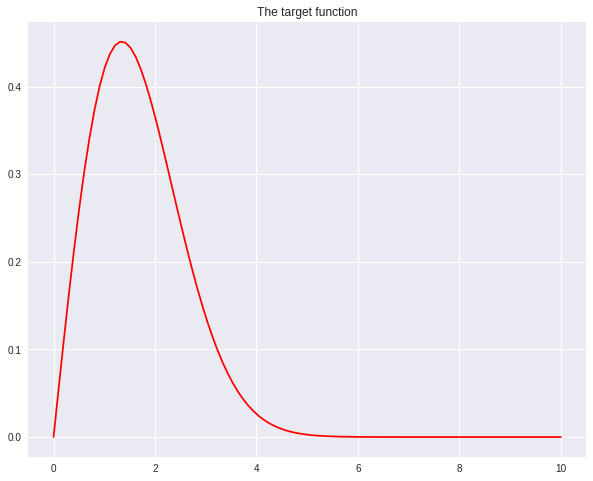

In [6]:
def metropolis_hastings(p,q, qdraw, nsamp, xinit):
    samples=np.empty(nsamp)
    x_prev = xinit
    accepted=0
    for i in range(nsamp):
        x_star = qdraw(x_prev)
        p_star = p(x_star)
        p_prev = p(x_prev)
        pdfratio = p_star/p_prev
        proposalratio = q(x_prev, x_star)/q(x_star, x_prev)
        if np.random.uniform() < min(1, pdfratio*proposalratio):
            samples[i] = x_star
            x_prev = x_star
            accepted +=1
        else:#we always get a sample
            samples[i]= x_prev
            
    return samples, accepted

# target function
f = lambda x: 0.554*x*np.exp(-(x/1.9)**2)

x = np.linspace(0,10,100)
plt.plot(x, f(x), 'r')
plt.grid('on')
plt.title('The target function')

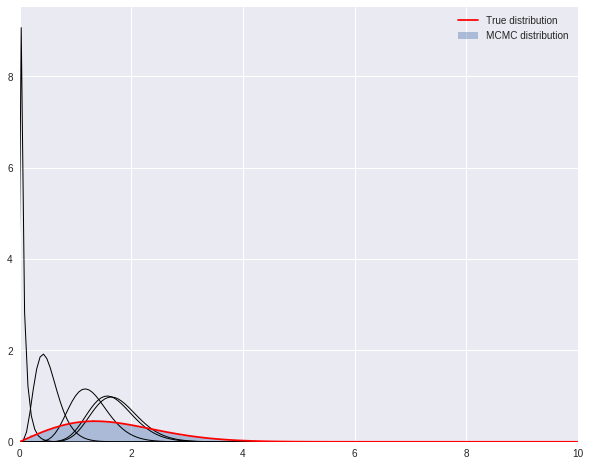

('starting point was ', 0.046819866389307574)


In [9]:
from scipy.stats import gamma

t=10.0

def gammapdf(x_new, x_old):
    return gamma.pdf(x_new, x_old*t, scale=1/t)

def gammadraw(x_old):
    return gamma.rvs(x_old*t,scale=1/t)

x_init = np.random.uniform()
samps, acc = metropolis_hastings(f, gammapdf, gammadraw, 100000, x_init)

# plot our sample histogram
plt.hist(samps,bins=100, alpha=0.4, label=u'MCMC distribution', normed=True) 
somesamps=samps[0::20000]
for i,s in enumerate(somesamps):
    xs=np.linspace(s-3, s+3, 100)
    plt.plot(xs, gamma.pdf(xs,s*t,scale=1/t),'k', lw=1)
xx= np.linspace(0,10,100)
plt.plot(xx, f(xx), 'r', label=u'True distribution') 
plt.legend()
plt.xlim([0,10])
plt.show()
print("starting point was ", x_init)

## 5. Gibbs Sampling

### 5.1 The idea of Gibbs Sampling

The idea of gibbs as a markov chain in which the transition matrix can be obtained as the kernel of the an integral fixed point equation by sampling alternatively from two conditionals.

Gibbs determined the energy states of gases at equilibrium by cycling through all the particles, drawing from each one of them conditionally given the enerygy levels of the others, taking the time average. 

Now, suppose you have a density function of two variables $(x,y)$. You wish to sample from this density.

The definition of the X marginal is 

$$
\begin{equation}
f_{X}(x)=\int f_{XY}(x,y)dy
\end{equation}
$$

We reformulate the above formula:

$$
\begin{equation}
f_{X}(x)=\int f_{XY}(x,y)dy=\int f(x\vert y)f(y)dy=\int f(x\vert y)dy\int f(y\vert x^{'})f(x^{'})dx^{'}
\end{equation}
$$

Thus

$$
\begin{equation}
f(x)=\int h(x,x^{'})f(x^{'})dx^{'}
\end{equation}
$$

where

$$
\begin{equation}
h(x,x^{'})=\int f(x\vert y)f(y\vert x^{'})dy
\end{equation}
$$

Now consider an iterative scheme in which the “transition kernel” $h(x,x′)$ is used to create a proposal for metropolis-hastings moves. This looks like:

$$
\begin{equation}
f(x_{t})=\int h(x_{t},x_{t-1})f(x_{t-1})dx_{t-1}
\end{equation}
$$

which is the equation of stationary distribution.

The big idea, then, here, as in the case of markov chains, is that the above equation can be thought of as a fixed-point integral equation, and thus we can think of an iterative process which at first does not satisy this condition but then does as time goes on and we reach stationarity.

Similarly here, if we draw $y$, from the conditional $f(y|x′)$ and then $x$ again from $f(x|y)$ we will be able to get the marginal distribution of $x$. Symmetrically we can get the marginal for $y$.

Now, if I can draw from the $x$ marginal, and the $y|x$ conditional, i can draw from the $x,y$ joint, and I am done.

#### 5.2 Gibbs Sampling Algorithm

- Given a string sampling $(x_{1},y_{1},z_{1})^{T}$.
- You want to sample: ${(x_{2},y_{2},z_{2})^{T}, (x_{3},y_{3},z_{3})^{T},...,(x_{N},y_{N},z_{N})^{T}}\sim P(x,y,z)$.
- Then the algorithm goes:

$$
\begin{aligned}
x_{2}&\sim P(x\vert y_{1},z_{1}) \\
y_{2}&\sim P(y\vert x_{2},z_{1}) \\
z_{2}&\sim P(z\vert y_{2},x_{2}) \\
&... \\
x_{3}&\sim P(x\vert y_{2},z_{2}) \\
y_{3}&\sim P(y\vert x_{3},z_{2}) \\
z_{3}&\sim P(z\vert x_{3},y_{3}) \\
\end{aligned}
$$


#### 5.3 Gibbs and MH Algorithm

Gibbs is the extension of MH Algorithm in high dimension and also is a special case of MH Algorithm without rejection. I will show you the proof.

Look at the M-H acceptance ratio:

- Let **x**=$x_{1},...,x_{D}$.
- When sampling $k$th component, $q_{k}(x^{*}\vert x)=\pi(x_{k}^{*}\vert x_{-k})$.
- When sampling $k$th component, $x^{*}_{-k}=x_{-k}$.

$$
\begin{equation}
\frac{\pi(x^{*})q(x\vert x^{*})}{\pi(x)q(x^{*}\vert x)}= \frac{\pi(x^{*})q_{k}(x\vert x^{*}_{-k})}{\pi(x)q(x^{*}_{k}\vert x_{-k})} = \frac{\pi(x^{*}\vert x^{*}_{-k})q_{k}(x\vert x^{*}_{-k})}{\pi(x_{k}\vert x_{-k})q(x^{*}_{k}\vert x_{-k})}=1
\end{equation}
$$

### Code of Gibbs Sampling

$$
\begin{equation}
f(x,y)=x^{2}\text{exp}(-xy^{2}-y^{2}-2*y-4*x)
\end{equation}
$$

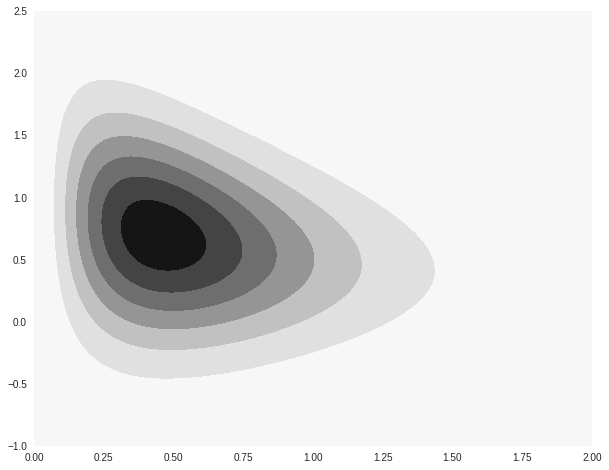

In [14]:
func = lambda x,y: x**2*np.exp( -x*y**2 - y**2 + 2*y - 4*x )

numgridpoints=400
x = np.linspace(0,2,numgridpoints)
y = np.linspace(-1,2.5,numgridpoints)
xx,yy = np.meshgrid(x,y)
zz = np.zeros((numgridpoints,numgridpoints))
for i in np.arange(0,numgridpoints):
    for j in np.arange(0,numgridpoints):
        zz[i,j]=func(xx[i,j],yy[i,j])
        
plt.contourf(xx,yy,zz)